In [12]:
import os
import math
import glob
import rasterio
import geopandas as gpd
import pandas as pd
import numpy as np
from rasterio.features import geometry_mask
import rasterio
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import re
from rasterio.features import geometry_mask
from shapely.geometry import box
from rasterio.transform import from_origin

import matplotlib.pyplot as plt
from rasterio.plot import show

# Setting parameters

In [13]:
field_id = "E166"
flight_type = 'MS'
src_drive = r"D:\\"
path_pix4d_gnrl = r"PhenoCrop\2_pix4d"
geojson_file = r"D:\PhenoCrop\3_qgis\3_Extraction Polygons\3. FINAL MASKS PYTHON\24 E166_test.geojson"

geojson_file = r"D:\PhenoCrop\3_qgis\3_Extraction Polygons\3. FINAL MASKS PYTHON\24 E166_sorted_ID_corrected_coordinate_system_polygons_shrinked.geojson"

In [14]:
# Generate the full source folder path for the Pix4D project files.
pix4d_path_src = os.path.join(src_drive, path_pix4d_gnrl, field_id, flight_type)

In [15]:
# Function to find the tif files in a given folder¶
def find_files_in_folder(folder_path, extension=None, recursive=False):
    matched_files = []
    # Determine the search pattern based on whether an extension is provided and recursion is enabled
    if extension:
        if recursive:
            search_pattern = os.path.join(folder_path, f"**/*.{extension}")
        else:
            search_pattern = os.path.join(folder_path, f"*.{extension}")
    else:
        # No extension specified, handle both recursive and non-recursive cases
        if recursive:
            search_pattern = os.path.join(folder_path, "**/*")
        else:
            search_pattern = os.path.join(folder_path, "*")
    # Use glob to find matching files in the specified directory and subdirectories if recursive
    matched_files.extend(glob.glob(search_pattern, recursive=recursive))
    # If no files are found, return a list with an empty string
    if not matched_files:
        matched_files = [""]
    return matched_files

In [16]:
# List all folders in the main project directory
import pprint as pp
folders = [name for name in os.listdir(pix4d_path_src) if os.path.isdir(os.path.join(pix4d_path_src, name))]
for proj in folders:    
    ortho_path = os.path.join(pix4d_path_src, proj, "2_Orthomosaics")
    ortho_files = find_files_in_folder (ortho_path, "tif")
    # for file in ortho_files:
    #     print(file)

In [17]:
paths = find_files_in_folder(ortho_path, "tif")
new_path = [name for name in paths[1:-1] if "ndvi"not in name]
geojson_file = geojson_file

In [18]:
geojson_file

'D:\\PhenoCrop\\3_qgis\\3_Extraction Polygons\\3. FINAL MASKS PYTHON\\24 E166_sorted_ID_corrected_coordinate_system_polygons_shrinked.geojson'

In [19]:
shp = gpd.read_file(geojson_file)
shp

,type,id,geometry
0,Feature,1,"MULTIPOLYGON (((10.75909 59.66356, 10.75904 59..."
1,Feature,14,"MULTIPOLYGON (((10.75918 59.66345, 10.75913 59..."
2,Feature,27,"MULTIPOLYGON (((10.75927 59.66335, 10.75922 59..."
3,Feature,2,"MULTIPOLYGON (((10.75913 59.66357, 10.75909 59..."
4,Feature,15,"MULTIPOLYGON (((10.75923 59.66346, 10.75918 59..."
5,Feature,28,"MULTIPOLYGON (((10.75932 59.66336, 10.75927 59..."
6,Feature,3,"MULTIPOLYGON (((10.75918 59.66358, 10.75914 59..."
7,Feature,16,"MULTIPOLYGON (((10.75928 59.66347, 10.75923 59..."
8,Feature,29,"MULTIPOLYGON (((10.75937 59.66337, 10.75932 59..."
9,Feature,4,"MULTIPOLYGON (((10.75923 59.66359, 10.75919 59..."


In [20]:
paths

['D:\\\\PhenoCrop\\2_pix4d\\E166\\MS\\20240812 E166 M3M 30m MS 80 85\\2_Orthomosaics\\20240812 E166 M3M 30m MS 80 85_index_green_green.tif',
 'D:\\\\PhenoCrop\\2_pix4d\\E166\\MS\\20240812 E166 M3M 30m MS 80 85\\2_Orthomosaics\\20240812 E166 M3M 30m MS 80 85_index_ndvi.tif',
 'D:\\\\PhenoCrop\\2_pix4d\\E166\\MS\\20240812 E166 M3M 30m MS 80 85\\2_Orthomosaics\\20240812 E166 M3M 30m MS 80 85_index_nir_nir.tif',
 'D:\\\\PhenoCrop\\2_pix4d\\E166\\MS\\20240812 E166 M3M 30m MS 80 85\\2_Orthomosaics\\20240812 E166 M3M 30m MS 80 85_index_red_edge_red_edge.tif',
 'D:\\\\PhenoCrop\\2_pix4d\\E166\\MS\\20240812 E166 M3M 30m MS 80 85\\2_Orthomosaics\\20240812 E166 M3M 30m MS 80 85_index_red_red.tif',
 'D:\\\\PhenoCrop\\2_pix4d\\E166\\MS\\20240812 E166 M3M 30m MS 80 85\\2_Orthomosaics\\20240812 E166 M3M 30m MS 80 85_transparent_mosaic_group1.tif']

# Convert the column names to lower() to avoid problems??

# Complete with data extraction automation.

## Compensates for presence of blue band ortho
## Generate several data aggregations


Reprojecting shapefile to match raster CRS: EPSG:32632
Processing geometry 1/39 (ID: 1)


<Figure size 640x480 with 0 Axes>

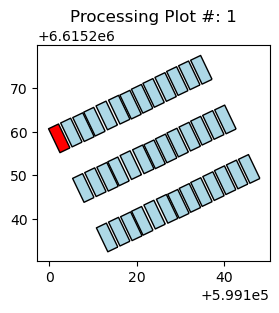

Validating geometry ID: 1
Processing geometry 2/39 (ID: 14)


<Figure size 640x480 with 0 Axes>

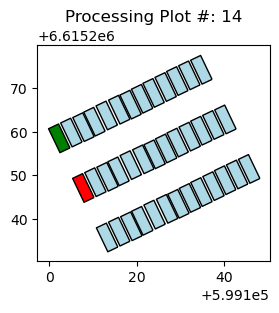

Validating geometry ID: 2
Processing geometry 3/39 (ID: 27)


<Figure size 640x480 with 0 Axes>

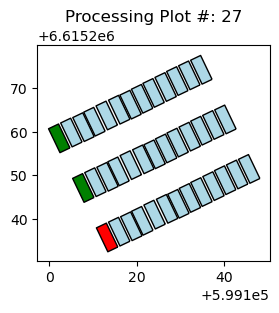

Validating geometry ID: 3
Processing geometry 4/39 (ID: 2)


<Figure size 640x480 with 0 Axes>

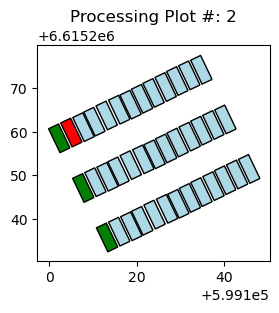

Validating geometry ID: 4
Processing geometry 5/39 (ID: 15)


<Figure size 640x480 with 0 Axes>

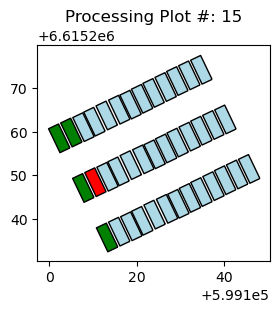

Validating geometry ID: 5
Processing geometry 6/39 (ID: 28)


<Figure size 640x480 with 0 Axes>

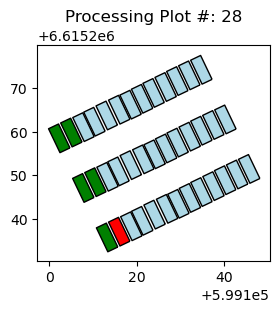

Validating geometry ID: 6
Processing geometry 7/39 (ID: 3)


<Figure size 640x480 with 0 Axes>

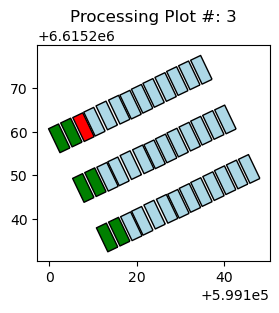

Validating geometry ID: 7
Processing geometry 8/39 (ID: 16)


<Figure size 640x480 with 0 Axes>

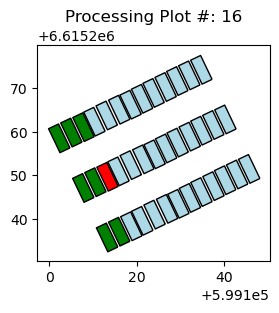

Validating geometry ID: 8
Processing geometry 9/39 (ID: 29)


<Figure size 640x480 with 0 Axes>

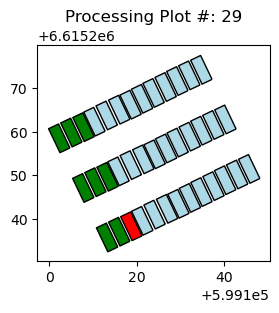

Validating geometry ID: 9
Processing geometry 10/39 (ID: 4)


<Figure size 640x480 with 0 Axes>

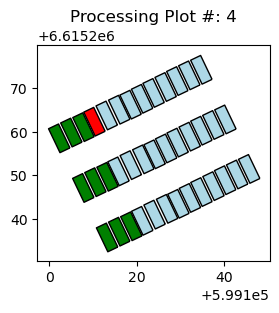

Validating geometry ID: 10
Processing geometry 11/39 (ID: 17)


<Figure size 640x480 with 0 Axes>

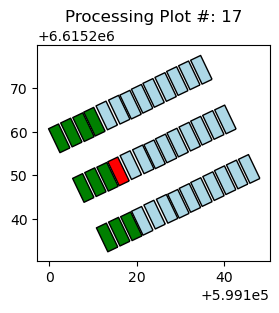

Validating geometry ID: 11
Processing geometry 12/39 (ID: 30)


<Figure size 640x480 with 0 Axes>

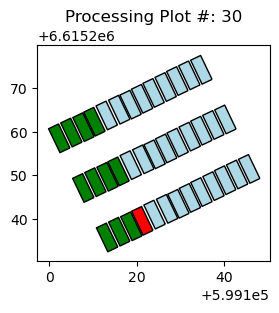

Validating geometry ID: 12
Processing geometry 13/39 (ID: 5)


<Figure size 640x480 with 0 Axes>

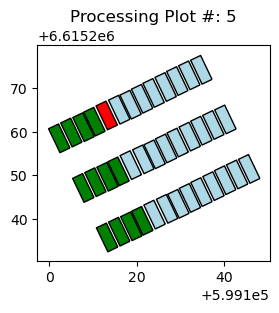

Validating geometry ID: 13
Processing geometry 14/39 (ID: 18)


<Figure size 640x480 with 0 Axes>

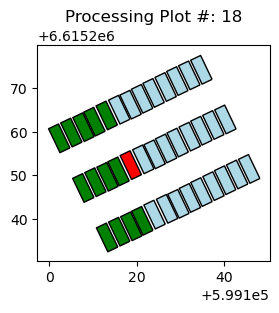

Validating geometry ID: 14
Processing geometry 15/39 (ID: 31)


<Figure size 640x480 with 0 Axes>

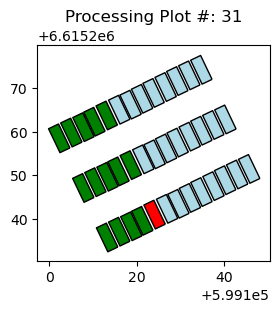

Validating geometry ID: 15
Processing geometry 16/39 (ID: 6)


<Figure size 640x480 with 0 Axes>

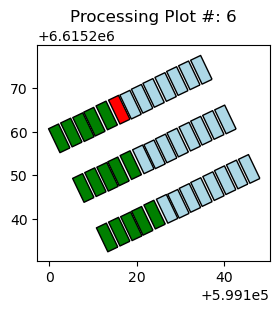

Validating geometry ID: 16
Processing geometry 17/39 (ID: 19)


<Figure size 640x480 with 0 Axes>

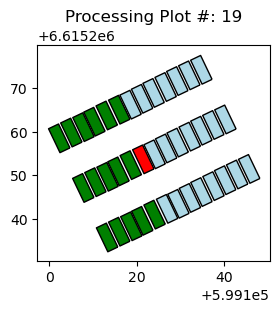

Validating geometry ID: 17
Processing geometry 18/39 (ID: 32)


<Figure size 640x480 with 0 Axes>

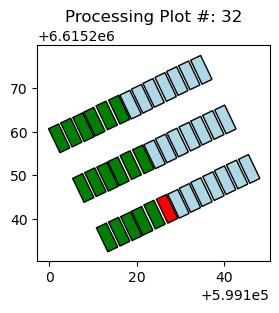

Validating geometry ID: 18
Processing geometry 19/39 (ID: 7)


<Figure size 640x480 with 0 Axes>

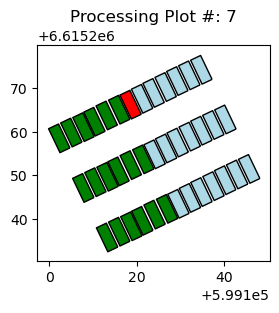

Validating geometry ID: 19
Processing geometry 20/39 (ID: 20)


<Figure size 640x480 with 0 Axes>

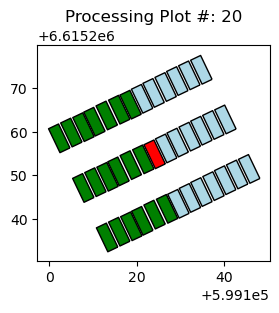

Validating geometry ID: 20
Processing geometry 21/39 (ID: 33)


<Figure size 640x480 with 0 Axes>

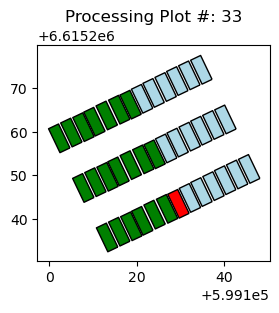

Validating geometry ID: 21
Processing geometry 22/39 (ID: 8)


<Figure size 640x480 with 0 Axes>

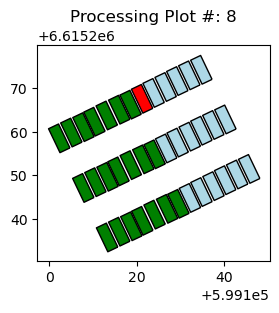

Validating geometry ID: 22
Processing geometry 23/39 (ID: 21)


<Figure size 640x480 with 0 Axes>

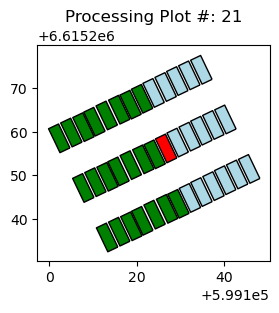

Validating geometry ID: 23
Processing geometry 24/39 (ID: 34)


<Figure size 640x480 with 0 Axes>

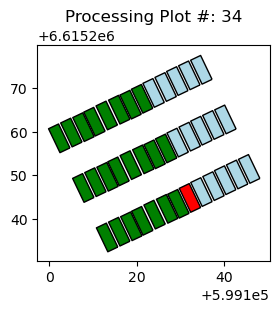

Validating geometry ID: 24
Processing geometry 25/39 (ID: 9)


<Figure size 640x480 with 0 Axes>

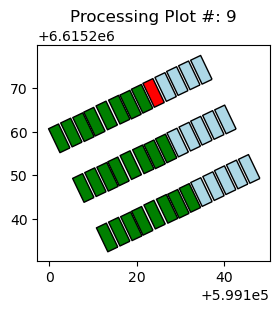

Validating geometry ID: 25
Processing geometry 26/39 (ID: 22)


<Figure size 640x480 with 0 Axes>

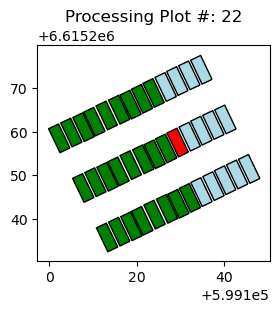

Validating geometry ID: 26
Processing geometry 27/39 (ID: 35)


<Figure size 640x480 with 0 Axes>

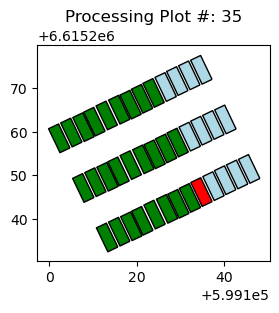

Validating geometry ID: 27
Processing geometry 28/39 (ID: 10)


<Figure size 640x480 with 0 Axes>

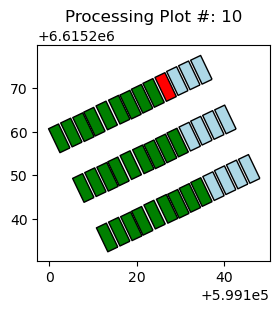

Validating geometry ID: 28
Processing geometry 29/39 (ID: 23)


<Figure size 640x480 with 0 Axes>

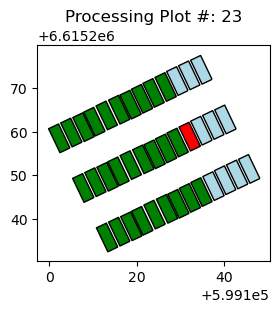

Validating geometry ID: 29
Processing geometry 30/39 (ID: 36)


<Figure size 640x480 with 0 Axes>

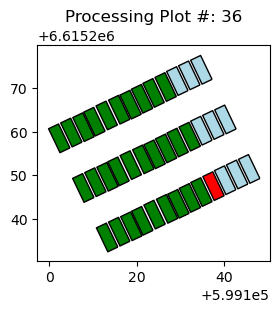

Validating geometry ID: 30
Processing geometry 31/39 (ID: 11)


<Figure size 640x480 with 0 Axes>

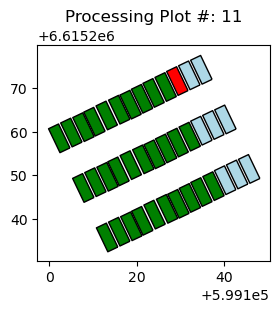

Validating geometry ID: 31
Processing geometry 32/39 (ID: 24)


<Figure size 640x480 with 0 Axes>

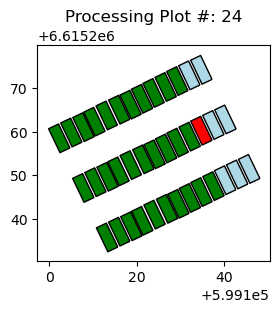

Validating geometry ID: 32
Processing geometry 33/39 (ID: 37)


<Figure size 640x480 with 0 Axes>

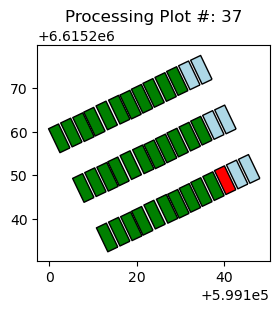

Validating geometry ID: 33
Processing geometry 34/39 (ID: 12)


<Figure size 640x480 with 0 Axes>

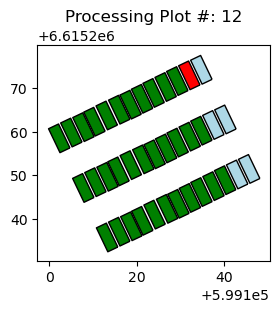

Validating geometry ID: 34
Processing geometry 35/39 (ID: 25)


<Figure size 640x480 with 0 Axes>

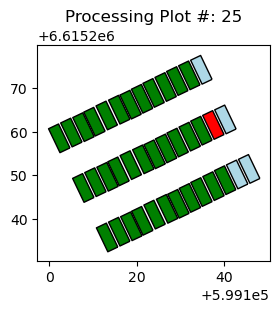

Validating geometry ID: 35
Processing geometry 36/39 (ID: 38)


<Figure size 640x480 with 0 Axes>

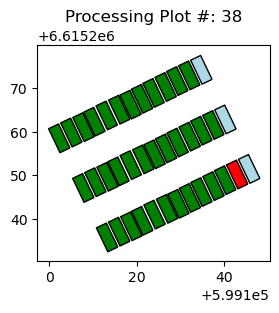

Validating geometry ID: 36
Processing geometry 37/39 (ID: 13)


<Figure size 640x480 with 0 Axes>

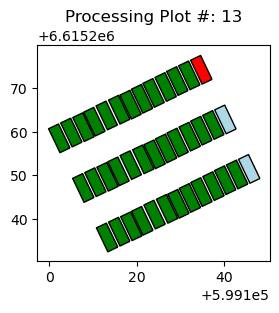

Validating geometry ID: 37
Processing geometry 38/39 (ID: 26)


<Figure size 640x480 with 0 Axes>

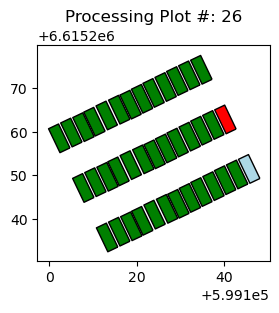

Validating geometry ID: 38
Processing geometry 39/39 (ID: 39)


<Figure size 640x480 with 0 Axes>

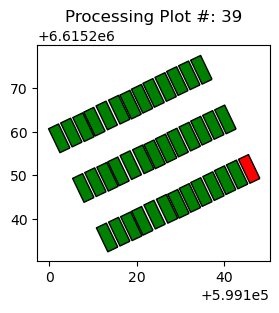

Validating geometry ID: 39


<Figure size 640x480 with 0 Axes>

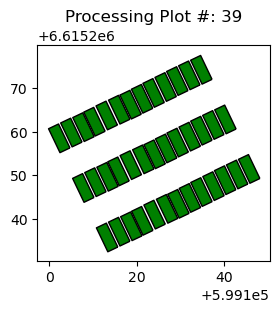

Saved results to 20240812_E166_M3M_30m_MS_80_85_statistics.csv


In [21]:
import rasterio
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import re
from rasterio.features import geometry_mask
from shapely.geometry import box
from rasterio.transform import from_origin

# Load the GeoJSON file
shp = gpd.read_file(geojson_file)

# Identify raster paths dynamically
green_raster_path = next((tif for tif in paths if "green_green" in tif), None)
nir_raster_path = next((tif for tif in paths if "nir_nir" in tif), None)
red_raster_path = next((tif for tif in paths if "red_red" in tif), None)
rededge_raster_path = next((tif for tif in paths if "red_edge_red_edge" in tif), None)
blue_raster_path = next((tif for tif in paths if "blue_blue" in tif), None)  # Optional

if not all([red_raster_path, green_raster_path, nir_raster_path, rededge_raster_path]):
    raise ValueError("Missing required raster files. Ensure all necessary orthomosaic bands are provided.")

def extract_common_prefix(file_paths):
    """Finds the common prefix among a list of file names."""
    common_prefix = os.path.commonprefix([os.path.basename(p) for p in file_paths])
    return re.sub(r'[^a-zA-Z0-9_-]', '', common_prefix.replace(" ", "_"))  # Clean any special characters
    
# Define output file name based on the common prefix of input files
output_csv = f"{extract_common_prefix(paths)}statistics.csv"

def calculate_band_statistics(band_array, geom, transform):
    """Computes multiple statistics for raster values within a given geometry."""
    # Ensure band_array is 2D
    if band_array.ndim != 2:
        raise ValueError("band_array must be a 2D array (height × width).")
    
    # Create a mask for the geometry
    mask = geometry_mask([geom], transform=transform, invert=True, out_shape=band_array.shape)

    if np.sum(mask) == 0:  # Check if any pixels were selected
        print(f"Warning: No valid pixels found for geometry {geom}")
        print(f"Mask unique values: {np.unique(mask)}")  # Should contain both True & False
        return {stat: np.nan for stat in STATISTICS_LIST}  # Return NaNs

    masked_values = band_array[mask]

    if masked_values.size == 0:
        print(f"Warning: All pixels are masked for geometry {geom}")
        print(f"Masked pixel values: {masked_values}")
        return {stat: np.nan for stat in STATISTICS_LIST}

    if masked_values.size == 0:
        return {stat: np.nan for stat in [
            "count", "sum", "mean", "median", "std", "min", "max", "range", "minority",
            "majority", "variety", "variance", "cv", "skewness", "kurtosis", "top_10", 
            "top_15", "top_20", "top_25", "top_35", "top_50", "q25", "q75", "iqr"
        ]}
    
    # Compute statistics    
    unique_vals, counts = np.unique(masked_values, return_counts=True)
    majority = unique_vals[np.argmax(counts)] if unique_vals.size > 0 else np.nan
    minority = unique_vals[np.argmin(counts)] if unique_vals.size > 0 else np.nan

    return {
        "count": masked_values.size,
        "sum": np.nansum(masked_values),
        "mean": np.nanmean(masked_values),
        "median": np.nanmedian(masked_values),
        "std": np.nanstd(masked_values),
        "min": np.nanmin(masked_values),
        "max": np.nanmax(masked_values),
        "range": np.nanmax(masked_values) - np.nanmin(masked_values),
        "minority": minority,
        "majority": majority,
        "variety": len(unique_vals),
        # Variance – Measures how spread out the values are.
        "variance": np.nanvar(masked_values),
        # Coefficient of Variation (CV) – Standard deviation divided by the mean (useful for comparing variability).
        "cv": np.nanstd(masked_values) / np.nanmean(masked_values) if np.nanmean(masked_values) != 0 else np.nan,
        # Skewness – Measures asymmetry of the distribution (negative = left-skewed, positive = right-skewed).
        "skewness": pd.Series(masked_values).skew(),
        # Kurtosis – Measures how peaked or flat the distribution is compared to a normal distribution.
        "kurtosis": pd.Series(masked_values).kurtosis(),
        "top_10": np.nanpercentile(masked_values, 90), # Top 10% of values
        "top_15": np.nanpercentile(masked_values, 85), # Top 15% of values
        "top_20": np.nanpercentile(masked_values, 80), # Top 20% of values
        # If you want high reflectance areas (e.g., bright areas), you'd analyze top 25% values
        "top_25": np.nanpercentile(masked_values, 75), # Top 25% of values
        "top_35": np.nanpercentile(masked_values, 65), # Top 35% of values
        "top_50": np.nanpercentile(masked_values, 50), # Top 50% of values
        # 25th Percentile (Q1) – First quartile, representing the lower 25% of values.
        # If you're looking for areas with low vegetation index (NDVI), you might analyze Q1 values.
        "q25": np.nanpercentile(masked_values, 25),
        # 75th Percentile (Q3) – Third quartile, representing the upper 25% of values.
        "q75": np.nanpercentile(masked_values, 75),
         # Interquartile Range (IQR) – Difference between Q3 and Q1, showing spread without extreme values.
        "iqr": np.nanpercentile(masked_values, 75) - np.nanpercentile(masked_values, 25)
    }

# Example mock geometry and transform for column preparation
mock_geom = box(0, 0, 3, 2)  # A simple bounding box geometry
mock_transform = from_origin(0, 3, 1, 1)  # Example affine transform

# Prepare an empty DataFrame dynamically
# Dynamically generate column names based on the statistics function
stats_columns = [
    f"{band}_{stat}" for band in ["NDVI", "green", "nir", "red", "rededge"]
    for stat in calculate_band_statistics(np.array([[1, 2, 3], [4, 5, 6]]), mock_geom, mock_transform).keys()
]

# If blue_raster_path exists, add blue statistics columns
if blue_raster_path:
    stats_columns.extend([
        f"blue_{stat}" for stat in calculate_band_statistics(np.array([[1, 2, 3], [4, 5, 6]]), mock_geom, mock_transform).keys()
    ])

# Initialize the output DataFrame using the ID column from the GeoJSON
stats_df = pd.DataFrame(index=shp["id"], columns=stats_columns)

def ensure_crs_alignment(shapefile, raster_crs):
    """Ensure the shapefile CRS matches the raster CRS."""
    if shapefile.crs != raster_crs:
        print(f"Reprojecting shapefile to match raster CRS: {raster_crs}")
        shapefile = shapefile.to_crs(raster_crs)
    return shapefile

# Function to plot with highlighted geometries based on their processing status
def plot_with_highlighted_geometry(shapefile, highlight_id, status, processed_ids, highlight_color='red', edgewidth=3, default_color='lightblue'):
    """
    Plots a GeoDataFrame with different colors for various stages of processing.
    
    Parameters:
    - shapefile (GeoDataFrame): The input GeoDataFrame containing geometries.
    - highlight_id (int or str): The ID of the geometry to highlight.
    - status (str): The processing status: 'processing', 'processed', or 'unprocessed'.
    - processed_ids (list): List of IDs of already processed polygons.
    - highlight_color (str): The color for the highlighted geometry's boundary. Default is 'red'.
    - edgewidth (float): The width of the boundary line for the highlighted geometry. Default is 3.
    - default_color (str): The default color for the other geometries. Default is 'lightblue'.
    """
    # Clear the current figure
    plt.clf()
    
    # Create a new figure   
    fig, ax = plt.subplots(figsize=(3, 3))

    # Plot the entire GeoDataFrame with different colors for processed and unprocessed geometries
    for idx, geom in shapefile.iterrows():
        # Check if the geometry has been processed
        if geom['id'] in processed_ids:
            color = 'green'  # Already processed
        elif geom['id'] == highlight_id:
            color = highlight_color  # Currently being processed
        else:
            color = default_color  # Unprocessed

        # Plot the individual geometry
        shapefile.loc[[idx]].plot(ax=ax, edgecolor='black', facecolor=color)

    # Set the title
    ax.set_title(f"Processing Plot #: {highlight_id}")

    # Display the plot
    plt.show()
    
def process_rasters():
    """Processes all geometries in the shapefile and calculates raster statistics."""

    # Open the blue raster separately if the path exists
    if blue_raster_path:
        blue = rasterio.open(blue_raster_path)
    else:
        blue = None
    
    with rasterio.open(red_raster_path) as red, \
         rasterio.open(green_raster_path) as green, \
         rasterio.open(nir_raster_path) as nir, \
         rasterio.open(rededge_raster_path) as rededge:

        # Ensure shapefile matches raster CRS
        shp_crs = ensure_crs_alignment(shp, red.crs)

        # Track processed polygons by ID
        processed_ids = []

        for i, geom in enumerate(shp_crs.geometry):
            print(f"Processing geometry {i + 1}/{len(shp_crs)} (ID: {shp_crs['id'][i]})")
            
            highlight_status = 'processing'

            # Highlight the current geometry being processed
            plot_with_highlighted_geometry(shp_crs, shp_crs.iloc[i]['id'], highlight_status, processed_ids)

            # Read bands as float
            red_band = red.read(1).astype(float)
            green_band = green.read(1).astype(float)
            nir_band = nir.read(1).astype(float)
            rededge_band = rededge.read(1).astype(float)
            if blue:
                blue_band = blue.read(1).astype(float) if blue_raster_path else None

            # Compute NDVI
            ndvi = np.where((nir_band + red_band) != 0, (nir_band - red_band) / (nir_band + red_band), np.nan)


            """Check if a geometry is valid and intersects raster bounds."""
            # Debugging: print geometry and bounds types
            print(f"Validating geometry ID: {i + 1}")  # Print geometry ID (unique ID for the geometry object)
            
            if geom.is_empty or geom.area == 0:
                return False, "Empty or invalid geometry."
            # Confirming intersection between the shape file element and the raster
            # Convert geometry bounds (tuple) to a shapely box
            geom_box = box(*geom.bounds)
            for band_ in [red, green, nir, rededge]:
                # Convert raster bounds (BoundingBox) to a shapely box
                raster_box = box(*band_.bounds)
                
                if not geom_box.intersects(raster_box):
                    print(f"Geometry {i} does not intersect the raster extent.")
                    continue
    
            # Calculate statistics
            stats_df.loc[shp_crs['id'][i], [f"NDVI_{stat}" for stat in calculate_band_statistics(ndvi, geom, red.transform).keys()]] = \
                list(calculate_band_statistics(ndvi, geom, red.transform).values())

            stats_df.loc[shp_crs['id'][i], [f"red_{stat}" for stat in calculate_band_statistics(red_band, geom, red.transform).keys()]] = \
                list(calculate_band_statistics(red_band, geom, red.transform).values())

            stats_df.loc[shp_crs['id'][i], [f"green_{stat}" for stat in calculate_band_statistics(green_band, geom, green.transform).keys()]] = \
                list(calculate_band_statistics(green_band, geom, green.transform).values())

            stats_df.loc[shp_crs['id'][i], [f"nir_{stat}" for stat in calculate_band_statistics(nir_band, geom, nir.transform).keys()]] = \
                list(calculate_band_statistics(nir_band, geom, nir.transform).values())

            stats_df.loc[shp_crs['id'][i], [f"rededge_{stat}" for stat in calculate_band_statistics(rededge_band, geom, rededge.transform).keys()]] = \
                list(calculate_band_statistics(rededge_band, geom, rededge.transform).values())

            if blue:
                stats_df.loc[shp_crs['id'][i], [f"blue_{stat}" for stat in calculate_band_statistics(blue_band, geom, blue.transform).keys()]] = \
                    list(calculate_band_statistics(blue_band, geom, blue.transform).values())

            # Update the status of the geometry to 'processed'
            processed_ids.append(shp_crs.iloc[i]['id'])

        highlight_status = 'Processing Complete'
        # Highlight the current geometry being processed
        plot_with_highlighted_geometry(shp_crs, shp_crs.iloc[i]['id'], highlight_status, processed_ids)

if __name__ == "__main__":
    process_rasters()
    stats_df.to_csv(output_csv, index_label="id")  # Save results at the end
    print(f"Saved results to {output_csv}")


# Printing ortho with Shape File overlay

In [ ]:
def validate_geometry(geom, raster_bounds):
    """Check if a geometry is valid and intersects raster bounds."""
    # Debugging: print geometry and bounds types
    print(f"Validating geometry ID: {id(geom)}")  # Print geometry ID (unique ID for the geometry object)
    print(f"Raster bounds: {raster_bounds}")

    if geom.is_empty or geom.area == 0:
        return False, "Empty or invalid geometry."
    
    # Convert raster bounds to a Shapely Polygon (bounding box)
    raster_polygon = box(raster_bounds[0], raster_bounds[1], raster_bounds[2], raster_bounds[3])

    # Debugging: print raster polygon type
    print(f"Raster polygon type: {type(raster_polygon)}")

    if not geom.intersects(raster_polygon):
        return False, "Geometry does not intersect raster bounds."

    return True, None

# Plot a geojson shapefile over an orthomosaic in Python 

Reprojecting GeoJSON to match raster CRS: EPSG:32632
Raster bounds: BoundingBox(left=598872.1764400001, bottom=6614338.196450001, right=598990.2488200001, top=6614534.689610001)
GeoJSON bounds: [ 598889.77594363 6614351.66415225  598976.56146997 6614518.51377003]


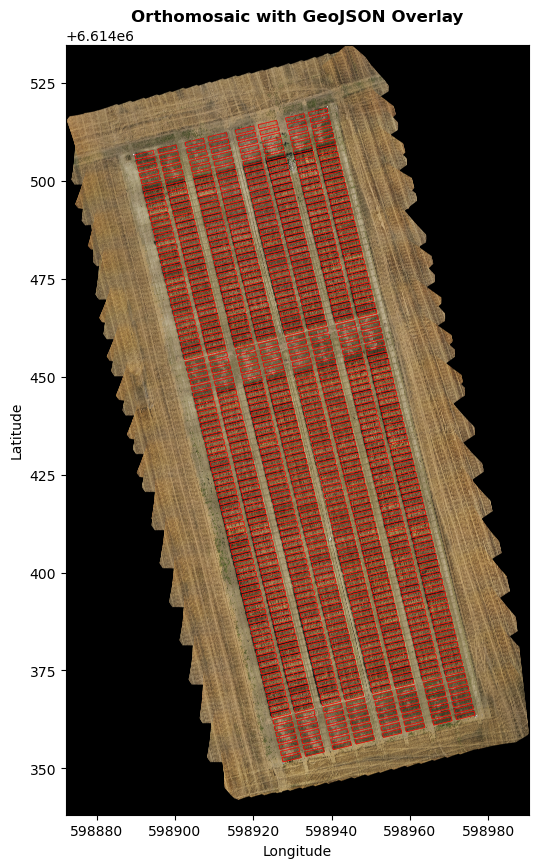

In [42]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.plot import show

def plot_orthomosaic_with_geojson(tif_path, geojson_path):
    """Reads and plots an orthomosaic GeoTIFF with a GeoJSON overlay using plot()."""
    
    # Open the TIFF file with rasterio
    with rasterio.open(tif_path) as src:
        # Read the raster data (assuming the first three bands are RGB)
        img_data = src.read([1, 2, 3])  # Reading the RGB bands (adjust if more bands exist)
        img_data = img_data.transpose(1, 2, 0)  # Reorder to (height, width, channels)

        # Create the plot
        fig, ax = plt.subplots(figsize=(10, 10))

        # Plot the orthomosaic image with matplotlib
        # Using rasterio's show to display the image as a background
        show(src, ax=ax, title="Orthomosaic with GeoJSON Overlay", adjust='box')

        # Load GeoJSON with geopandas
        shapefile = gpd.read_file(geojson_path)
        
        # Check CRS of the GeoJSON and reproject if necessary
        if shapefile.crs != src.crs:
            print(f"Reprojecting GeoJSON to match raster CRS: {src.crs}")
            shapefile = shapefile.to_crs(src.crs)
        
        # Print the bounds for debugging
        print("Raster bounds:", src.bounds)
        print("GeoJSON bounds:", shapefile.total_bounds)

        # Plot the GeoJSON overlay on top of the orthomosaic
        shapefile.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=0.5)  # Plot boundaries
        
        # # Optionally, fill the polygons with a transparent color
        # shapefile.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=2)
        
        # Show the plot
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()

# Example usage
tif_path = paths[-1]  # Replace with the path to your orthomosaic
geojson_path = "24 PhenoCrop - Copy.geojson"  # Replace with the path to your GeoJSON file

plot_orthomosaic_with_geojson(tif_path, geojson_path)


# Find out the resolution of the source file

In [47]:
import rasterio
with rasterio.open(paths[1]) as src:
    print("Resolution of the orthomosaic:", src.res)

Resolution: (0.011460000000000001, 0.011460000000000001)


# Verify that each raster in raster_paths has valid metadata, including bounds and CRS.

In [39]:
for band, path in raster_paths.items():
    with rasterio.open(path) as src:
        print(f"Checking {band}: Bounds={src.bounds}, CRS={src.crs}")

Checking red: Bounds=BoundingBox(left=598872.1764400001, bottom=6614334.689610001, right=598992.1764400001, top=6614534.689610001), CRS=EPSG:32632
Checking blue: Bounds=BoundingBox(left=598872.1764400001, bottom=6614334.689610001, right=598992.1764400001, top=6614534.689610001), CRS=EPSG:32632
Checking green: Bounds=BoundingBox(left=598872.1764400001, bottom=6614334.689610001, right=598992.1764400001, top=6614534.689610001), CRS=EPSG:32632
Checking nir: Bounds=BoundingBox(left=598872.1764400001, bottom=6614334.689610001, right=598992.1764400001, top=6614534.689610001), CRS=EPSG:32632
Checking red_edge: Bounds=BoundingBox(left=598872.1764400001, bottom=6614334.689610001, right=598992.1764400001, top=6614534.689610001), CRS=EPSG:32632
